<a href="https://colab.research.google.com/github/seokjinwoo/EconBigData/blob/main/lec6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연속확률분포

- 확률밀도함수(probability density function)

### 정규분포(normal distribution)

- 확률 및 통계학, 계량경제학에서 가장 자주 등장하는 확률분포

- **중심극한정리**(central limit theorem)와 관련이 있는 분포
  - 확률변수들의 합 혹은 표본평균(sample mean)의 분포는 $n$이 커질수록(많이 더할수록) 정규분포로 수렴하게 됨

- 정규분포의 특성은 연속(continuous), 모두 2개로 규정이 가능한 분포(평균 $\mu$과 분산 $\sigma^2$(표준편차))

- 표준정규분포는 평균이 0이고, 분산이 1인 정규분포다

$$
X \sim N(0,1)
$$

- 표준정규분포를 따르는 확률변수의 확률밀도함수는 다음과 같음
  - 평균 0을 기준으로 해서 대칭적이고
  - 꼬리 부분이 상당히 빠르게 감소한다.
    - 꼬리가 빠르게 줄지 않는 분포도 존재함(Pareto distribution) -> fat tail
    - 소득/자산 분포를 보는 연구의 경우, 소득/자산 양극화

  - 밀도함수의 아래 면적을 적분하면 1이 됨
  - 정규화(normalize, 확률변수에서 평균을 빼고, 표준편차로 나누게 됨)를 거치게 되면, 정규분포는 표준정규분포로 바꿀 수 있음

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}x^2}
$$



- 좀 더 일반적인 정규분포의 pdf는 다음과 같음

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

---

- 표준정규분포를 따르는 확률변수 $Z$의 특성이 뭐냐면

$$
\Pr(-1 \leq Z \leq 1) = 0.68
$$


$$
\Pr(-2 \leq Z \leq 2(1.96)) = 0.95
$$


$$
\Pr(-3 \leq Z \leq 3) = 0.997
$$







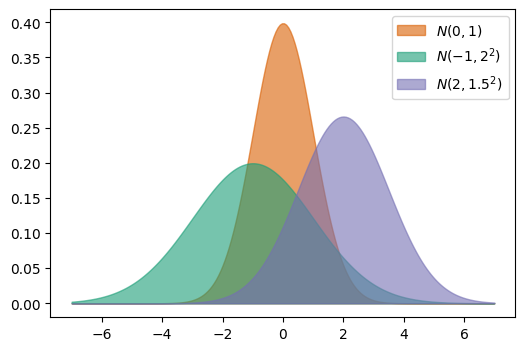

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 데이터 생성
x = np.linspace(-7, 7, 200)
y1 = norm.pdf(x,0,1)    # 표준정규분포
y2 = norm.pdf(x, -1,2)
y3 = norm.pdf(x, 2, 1.5)

plt.figure(figsize=(6,4))

# plt.plot(x, y1)
color =['#d95f02', '#1b9e77', '#7570b3']
plt.fill_between(x, y1, color = color[0], alpha=0.6, label='$N(0,1)$')
plt.fill_between(x, y2, color = color[1], alpha=0.6, label='$N(-1,2^2)$')
plt.fill_between(x, y3, color = color[2], alpha=0.6, label='$N(2,1.5^2)$')

plt.legend()
plt.show()

---

### 로그-정규분포 분포(log-normal distribution)

- 경제 경영 데이터에서는 정규분포가 많이 나오지는 않음
- 시장을 통한 경쟁의 결과롤 나오는 가격이나 거래량, 소득, 자산, 임금

- 그 자체는 정규부포는 아니지만 자연대수 $\ln()$를 취한 후에(log-transformation)을 한 이후에는 정규부포를 따르게 되는 분포

- 로그-정규분포를 따른다고 함

-  확률변수 $X$가 있는데, $W = \ln(X)$는 정규분포를 따르게 됨

- $X = \exp(W)$

- $X$의 pdf 는 뭐냐?

$$ f(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}} \quad \text{for } x > 0 $$

- $E[X] = \exp(\mu) $ 는 아님

$$ E[X] = e^{\mu + \frac{\sigma^2}{2}} $$


- 계량경제 분석에서 경제 변수들 같은 경우에 로그-변환해서 사용하는 경우가 다수임
  - 로그-변화 이후에 정규분포를 따르는 경우, 모형의 성질이 상당히 좋아짐


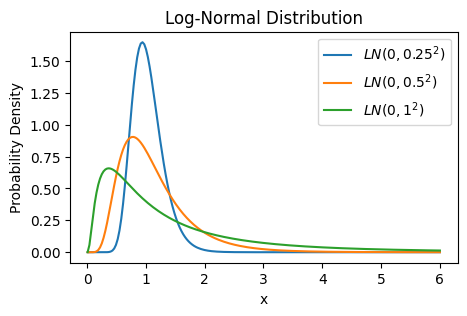

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# x의 범위 설정
x = np.linspace(0.01,6, 200)

# 로그-정규분포의 밀도함수
y1 = lognorm.pdf(x, s=0.25, scale=np.exp(0))
y2 = lognorm.pdf(x, s=0.5, scale=np.exp(0))
y3 = lognorm.pdf(x, s=1, scale=np.exp(0))



plt.figure(figsize = (5,3))

plt.plot(x, y1, label='$LN(0, 0.25^2)$')
plt.plot(x, y2, label='$LN(0, 0.5^2)$')
plt.plot(x, y3, label='$LN(0, 1^2)$')

plt.title('Log-Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')

plt.legend()

plt.show()

### 지수분포(exponential distribution)

- Poisson 분포: 주어진 시간(단위 시간) 내에서 몇 번의 사건이 벌어지느냐($\lambda$)

- 사건이 처음 벌어질 때까지 걸리는 시간.
  - $\lambda$의 크기에 따라서, 사건이 한 번 벌어질 때까지 소요되는 시간이 짧아지기도 하고 길어지고 한다.
    - 약을 먹었거나, 수술을 받았거나, 고장이 난다, 사망할 때까지 소요되는 시간, 구직까지 걸리는 시간
  - $\lambda$: 위험률(hazard rate)

- 소요시간(duration) $T$의 분포

- 지수분포(exponential distribution)

$$
f(t) = \lambda \exp(-\lambda t), (t \geq 0)
$$

- 지수분포는 포아송분포와 쌍둥이 분포

- $E[T] = \frac{1}{\lambda}$

- 생존분석(survival analysis)에 가장 기초적인 분포로 사용이 자주 됨.

- 지속기간과 지속기간 사이에 메모리가 없음(memoryless property)



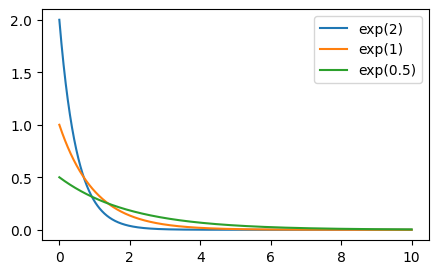

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

t = np.linspace(0,10, 1000)
y0 = expon.pdf(t, scale=0.5) # scale은 lambda의 역수
y1 = expon.pdf(t, scale=1)
y2 = expon.pdf(t, scale=2)

plt.figure(figsize=(5,3))
plt.plot(t,y0, label = 'exp(2)')
plt.plot(t,y1, label = 'exp(1)')
plt.plot(t,y2, label = 'exp(0.5)')

plt.legend()

plt.show()


### 카이제곱 분포(chi-square distribution)

- $X^2$의 분포가 뭐냐? 분산을 다루다보면, 제곱한 것의 분포가 뭐냐?

- $\sum_{i} X_i^2$, 제곱한 것을 더한 것들의 분포는 어떻게 생겼느냐?

- 표준정규분포 $Z$를 제곱한 것 $Z^2$을 어떤 분포를 따르냐.

- 카에제곱 분포($\chi^2$(1))를 따른다고 정의.  

$$
Z_1^2 + Z_2^2 \sim \chi^2(2)
$$

- 자유도가 2인 카이제곱 분포

- 만약에 표준정규분포를 따르는 확률변수들의 제곱을 $k$개 더하는 경우 자유도가 $k$인 카이제곱분포를 따른다고 한다.

$$
X = Z_1^2 + Z_2^2 + \dots + Z_k^2 \sim \chi^2(k)
$$

- 확률밀도함수

$$ f(x; k) = \frac{x^{\frac{k}{2} - 1} e^{-\frac{x}{2}}}{2^{\frac{k}{2}} \Gamma\left(\frac{k}{2}\right)} \quad \text{for } x > 0 $$

여기서:
- $x$는 확률 변수 ($x > 0$)
- $k$는 자유도 (양의 정수)
- $\Gamma(\cdot)$는 감마 함수 (Gamma Function)


- $E[X] = k$, $var(X) = 2k$

- $k$가 커질수록 카이제곱 분포는 정규분포로 수렴하게 됨(중심극한정리, CLT)





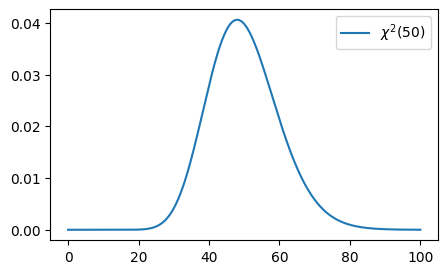

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# x의 범위 설정
x = np.linspace(0,100,500)

y1 = chi2.pdf(x, 1)
y2 = chi2.pdf(x, 5)
y3 = chi2.pdf(x, 50)

plt.figure(figsize=(5,3))
# plt.plot(x, y1, label = '$\\chi^2(1)$')
# plt.plot(x, y2, label = '$\\chi^2(5)$')
plt.plot(x, y3 , label = '$\\chi^2(50)$')

plt.legend()
plt.show()